<a href="https://colab.research.google.com/github/denniss83/Borsa_Istanbul_Portfoy_Simulatoru_Risk_Getiri_ve_Prophet_ile_Gelecek_Tahmini_2023_2024/blob/main/Borsa_%C4%B0stanbul_Portf%C3%B6y_Sim%C3%BClat%C3%B6r%C3%BC_Risk%2C_Getiri_ve_Prophet_ile_Gelecek_Tahmini_(2023%E2%80%932024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lisans
Bu notebook, [Deniz Atabey](https://github.com/denniss83) tarafından hazırlanmıştır.  
Telif Hakkı © 2025 Deniz Atabey  
Bu çalışma [Creative Commons Atıf-GayriTicari 4.0 Uluslararası (CC BY-NC 4.0)](https://creativecommons.org/licenses/by-nc/4.0/) lisansı ile lisanslanmıştır.

- Yalnızca eğitim, akademik ve kişisel kullanım içindir.
- Ticari amaçlarla kullanılamaz.
- Herhangi bir kısmını kullanırsanız lütfen kaynak gösterin.

# 📈 Borsa İstanbul Portföy Simülatörü: Risk, Getiri ve Prophet ile Gelecek Tahmini (2023–2024)


---
❗️⚠️ **Uyarı:** **Bu çalışma yalnızca python ile veri analizi kapsamında eğitim ve öğrenme amaçlıdır. Hiçbir şekilde yatırım tavsiyesi niteliği taşımaz.**


---



Bu projede, Borsa İstanbul'da işlem gören hisselerin 2023–2024 dönemi fiyat verileri analiz edilmiştir.
Amaç, yatırımcı perspektifinden bakarak hisse performanslarını değerlendirmek ve farklı portföy stratejileriyle getirileri karşılaştırmaktır.

YFinance üzerinden alınan verilerle şu analizler yapılmıştır:

- Ortalama fiyat, günlük ve yıllık getiri
- Günlük volatilite analizi
- En çok kazandıran ve kaybettiren hisseler
- Getiri–risk ilişkisi (Sharpe oranı dahil)
- Korelasyon analizi (heatmap)
- Portföy analizleri
- Prophet ile gelecek tahmini
---



In [1]:
!pip install yfinance
!pip install pandas numpy
!pip install matplotlib seaborn plotly
!pip install scipy
!pip install pandas_market_calendars

# Gerekli Kütüphaneler

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import datetime
import warnings
warnings.filterwarnings("ignore")

# Veri Yükleme

YFinance kütüphanesi üzerinden Borsa İstanbul hisseleri çekilmiş; kapanış fiyatları kullanılmıştır.  
Eksik veriler ayıklanarak, analizde tutarlılık sağlanmıştır.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving bist100.xlsx to bist100 (3).xlsx


In [4]:
df = pd.read_excel("bist100.xlsx")
df.head()


,Sembol
0,ASELSASELSAN ELEKTRONİK SANAYİ VE TİCARET A.Ş.G
1,GARANTÜRKİYE GARANTİ BANKASI A.Ş.G
2,ENKAIENKA İNŞAAT VE SANAYİ A.Ş.G
3,THYAOTÜRK HAVA YOLLARI A.O.G
4,KCHOLKOÇ HOLDİNG A.Ş.G


In [5]:
df['Kod'] = df['Sembol'].str[:4]

In [6]:
df['YFinance_Kodu'] = df['Kod'].str.upper() + '.IS'

In [7]:
df = pd.read_excel('/content/bist100.xlsx')

df['Kod'] = df['Sembol'].str.extract(r'^([A-Z]{4,5})')

df['YF_Kod'] = df['Kod'].str.upper() + '.IS'

df = df[df['YF_Kod'].notna()]

print(df[['Sembol', 'Kod', 'YF_Kod']].head())


                                            Sembol    Kod    YF_Kod
0  ASELSASELSAN ELEKTRONİK SANAYİ VE TİCARET A.Ş.G  ASELS  ASELS.IS
1               GARANTÜRKİYE GARANTİ BANKASI A.Ş.G  GARAN  GARAN.IS
2                 ENKAIENKA İNŞAAT VE SANAYİ A.Ş.G  ENKAI  ENKAI.IS
3                     THYAOTÜRK HAVA YOLLARI A.O.G  THYAO  THYAO.IS
4                           KCHOLKOÇ HOLDİNG A.Ş.G  KCHOL  KCHOL.IS


In [8]:
hisse_listesi = df['YF_Kod'].tolist()

start = "2023-01-01"
end = "2024-12-31"

df_fiyatlar = pd.DataFrame()

for hisse in hisse_listesi:
    try:
        data = yf.download(hisse, start=start, end=end)
        df_fiyatlar[hisse] = data['Close']
    except Exception as e:
        print(f"{hisse} için veri alınamadı: {e}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [9]:
df_fiyatlar.head()

,ASELS.IS,GARAN.IS,ENKAI.IS,THYAO.IS,KCHOL.IS,ISCTR.IS,AKBNK.IS,FROTO.IS,BIMAS.IS,TUPRS.IS,...,VESTL.IS,CANTE.IS,BERAB.IS,BINHO.IS,REEDR.IS,GSRAY.IS,ODASO.IS,IEYHO.IS,BALSU.IS,GLRMK.IS
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-02,32.299999,29.284286,31.254690,146.800003,76.033546,5.224,17.025980,50.461807,133.636246,76.400002,...,73.000000,7.638951,NaN,NaN,NaN,4.251484,NaN,2.20,NaN,NaN
2023-01-03,34.549999,28.519184,32.363014,147.399994,74.998764,5.068,16.651781,49.236507,134.307755,74.928574,...,78.500000,7.108245,NaN,NaN,NaN,4.142751,NaN,2.12,NaN,NaN
2023-01-04,32.575001,28.691332,31.845797,144.500000,74.818802,5.012,16.711311,47.852200,131.046021,73.214287,...,77.000000,7.065360,NaN,NaN,NaN,3.903537,NaN,2.06,NaN,NaN
2023-01-05,31.075001,27.658445,31.106915,141.800003,72.884224,4.816,16.218054,46.870087,126.153381,71.371429,...,73.349998,6.765163,NaN,NaN,NaN,3.696943,NaN,1.94,NaN,NaN
2023-01-06,31.450001,26.988979,31.531769,142.500000,71.444542,4.828,15.903389,46.870087,124.138741,72.614288,...,73.500000,6.609703,NaN,NaN,NaN,3.696943,NaN,1.96,NaN,NaN


In [10]:
print("Şekil:", df_fiyatlar.shape)
print("Sütunlar:", df_fiyatlar.columns.tolist())

Şekil: (497, 100)
Sütunlar: ['ASELS.IS', 'GARAN.IS', 'ENKAI.IS', 'THYAO.IS', 'KCHOL.IS', 'ISCTR.IS', 'AKBNK.IS', 'FROTO.IS', 'BIMAS.IS', 'TUPRS.IS', 'YKBNK.IS', 'VAKBN.IS', 'TCELL.IS', 'TTKOM.IS', 'SAHOL.IS', 'EREGL.IS', 'HALKB.IS', 'CCOLA.IS', 'SASAS.IS', 'PGSUS.IS', 'DSTKF.IS', 'OYAKC.IS', 'SISET.IS', 'TOASO.IS', 'TAVHL.IS', 'ASTOR.IS', 'AEFES.IS', 'MGROS.IS', 'ARCLK.IS', 'TURSG.IS', 'GUBRF.IS', 'KOZAL.IS', 'ENJSA.IS', 'MPARK.IS', 'EKGYO.IS', 'AGHOL.IS', 'ENERY.IS', 'TTRAK.IS', 'PASEU.IS', 'ISMEN.IS', 'BRYAT.IS', 'OTKAR.IS', 'TABGD.IS', 'CIMSA.IS', 'ANSGR.IS', 'BRSAN.IS', 'GENIL.IS', 'PETKM.IS', 'EFORC.IS', 'CLEBI.IS', 'AKSEN.IS', 'DOHOL.IS', 'TKFEN.IS', 'GRTHO.IS', 'ULKER.IS', 'MAGEN.IS', 'ALARK.IS', 'AKSAA.IS', 'TSKBT.IS', 'DOASD.IS', 'RALYH.IS', 'KOZAA.IS', 'MAVIM.IS', 'KRDMD.IS', 'GRSEL.IS', 'HEKTS.IS', 'KCAER.IS', 'AVPGY.IS', 'BTCIM.IS', 'OBAMS.IS', 'EGEEN.IS', 'BSOKE.IS', 'KUYAS.IS', 'SOKM.IS', 'ALTNY.IS', 'GESAN.IS', 'SKBNK.IS', 'KTLEV.IS', 'EUPWR.IS', 'SMRTG.IS', 'TUREX.IS', 

In [11]:
print("Başlangıç tarihi:", df_fiyatlar.index.min())
print("Bitiş tarihi:", df_fiyatlar.index.max())

Başlangıç tarihi: 2023-01-02 00:00:00
Bitiş tarihi: 2024-12-30 00:00:00


In [12]:
print("Eksik veri sayısı (toplam):")
print(df_fiyatlar.isnull().sum())

Eksik veri sayısı (toplam):
ASELS.IS      0
GARAN.IS      0
ENKAI.IS      0
THYAO.IS      0
KCHOL.IS      0
           ... 
GSRAY.IS      0
ODASO.IS    497
IEYHO.IS      0
BALSU.IS    497
GLRMK.IS    497
Length: 100, dtype: int64


# Genel Analiz – Tüm Hisseler Üzerinden

## Ortalama Genel Veriler

Piyasa genelinde ortalama fiyat, ortalama günlük getiri, volatilite ve yıllık bazda ortalama getiri hesaplanmıştır.


In [13]:
gunluk_getiriler = df_fiyatlar.pct_change()

ortalama_fiyat = df_fiyatlar.mean().mean()

ortalama_gunluk_getiri = gunluk_getiriler.mean().mean()

ortalama_volatilite = gunluk_getiriler.std().mean()

ortalama_yillik_getiri = (1 + ortalama_gunluk_getiri) ** 252 - 1

veri = {
    'Ortalama Kapanış Fiyatı (₺)': round(ortalama_fiyat, 2),
    'Ortalama Günlük Getiri (%)': round(ortalama_gunluk_getiri * 100, 2),
    'Ortalama Günlük Volatilite (%)': round(ortalama_volatilite * 100, 2),
    'Ortalama Yıllık Getiri (%)': round(ortalama_yillik_getiri * 100, 2),
}

pd.DataFrame([veri])

,Ortalama Kapanış Fiyatı (₺),Ortalama Günlük Getiri (%),Ortalama Günlük Volatilite (%),Ortalama Yıllık Getiri (%)
0,225.78,0.23,3.48,76.98


## En Yüksek Ortalama Fiyat

Son 2 yılda en yüksek ortalama fiyata sahip hisseler grafikle sunulmuştur.


In [14]:
hisse_analiz = pd.DataFrame({
    'Hisse': df_fiyatlar.columns,
    'Ortalama Fiyat': df_fiyatlar.mean(),
    'Volatilite (%)': gunluk_getiriler.std() * 100,
    'Yıllık Getiri (%)': ((1 + gunluk_getiriler.mean()) ** 252 - 1) * 100
})

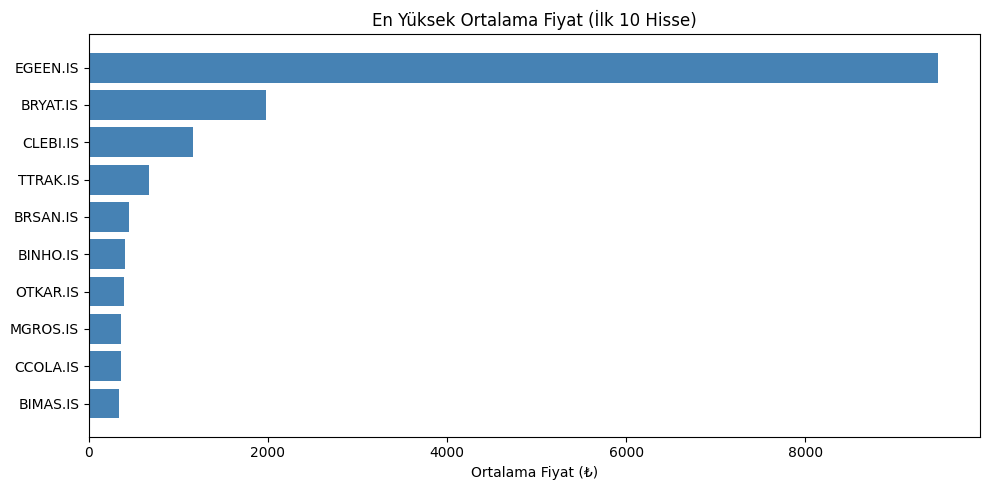

In [15]:
en_yuksek_fiyat = hisse_analiz.sort_values("Ortalama Fiyat", ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.barh(en_yuksek_fiyat['Hisse'], en_yuksek_fiyat['Ortalama Fiyat'], color='steelblue')
plt.xlabel("Ortalama Fiyat (₺)")
plt.title("En Yüksek Ortalama Fiyat (İlk 10 Hisse)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## En Volatil Hisseler (Oynaklık – Risk)

Volatilitesi en yüksek olan ilk 10 hisse, risk–getiri dengesi açısından değerlendirilmiştir.


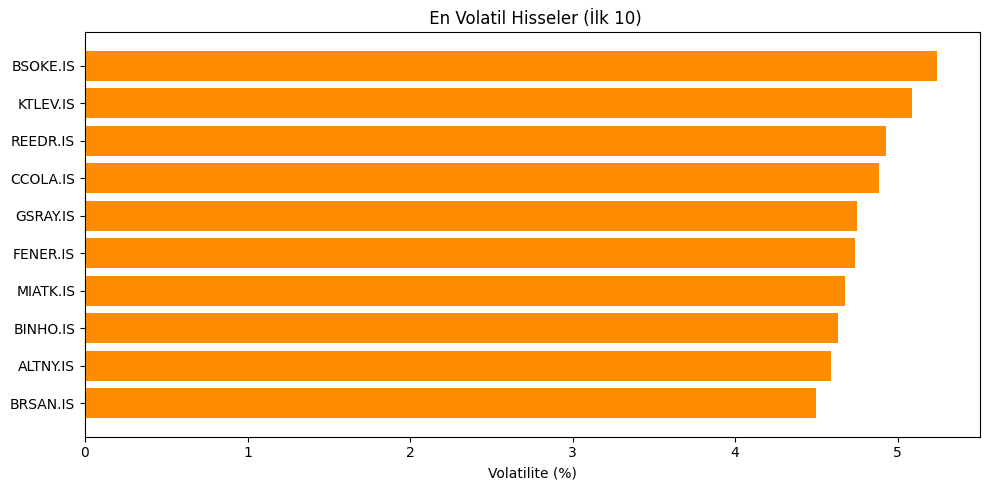

In [16]:
en_volatil = hisse_analiz.sort_values("Volatilite (%)", ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.barh(en_volatil['Hisse'], en_volatil['Volatilite (%)'], color='darkorange')
plt.xlabel("Volatilite (%)")
plt.title(" En Volatil Hisseler (İlk 10)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## En Yüksek ve Düşük Yıllık Getiri

Yıllık getiriler bazında piyasanın en kazandıran ve en çok kaybettiren hisseleri incelenmiştir.

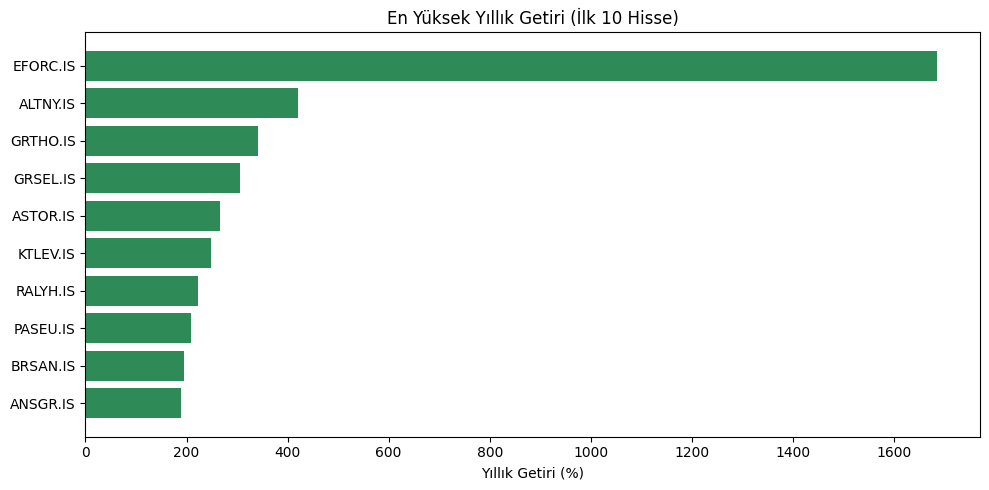

In [17]:
en_yuksek_getiri = hisse_analiz.sort_values("Yıllık Getiri (%)", ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.barh(en_yuksek_getiri['Hisse'], en_yuksek_getiri['Yıllık Getiri (%)'], color='seagreen')
plt.xlabel("Yıllık Getiri (%)")
plt.title("En Yüksek Yıllık Getiri (İlk 10 Hisse)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Negatif Yıllık Getirili Hisseler

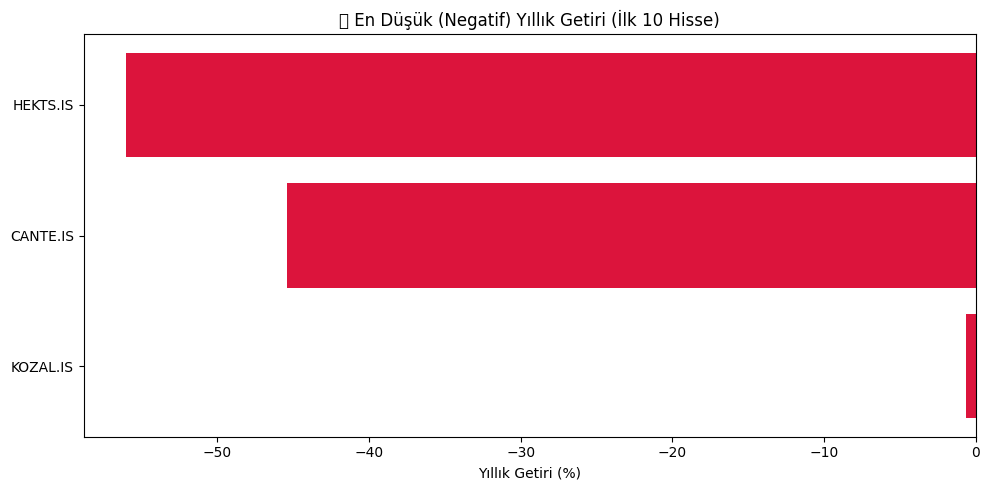

In [18]:
negatif_getiri = hisse_analiz[hisse_analiz["Yıllık Getiri (%)"] < 0].sort_values("Yıllık Getiri (%)").head(10)

plt.figure(figsize=(10, 5))
plt.barh(negatif_getiri['Hisse'], negatif_getiri['Yıllık Getiri (%)'], color='crimson')
plt.xlabel("Yıllık Getiri (%)")
plt.title("📉 En Düşük (Negatif) Yıllık Getiri (İlk 10 Hisse)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## En Çok ve En Az Değişen Hisseler (Yıllık Yüzde Değişim Analizi)

2023 başı ile 2024 sonu arasındaki yüzde değişim analiz edilerek en çok artan ve azalan hisseler belirlenmiştir.


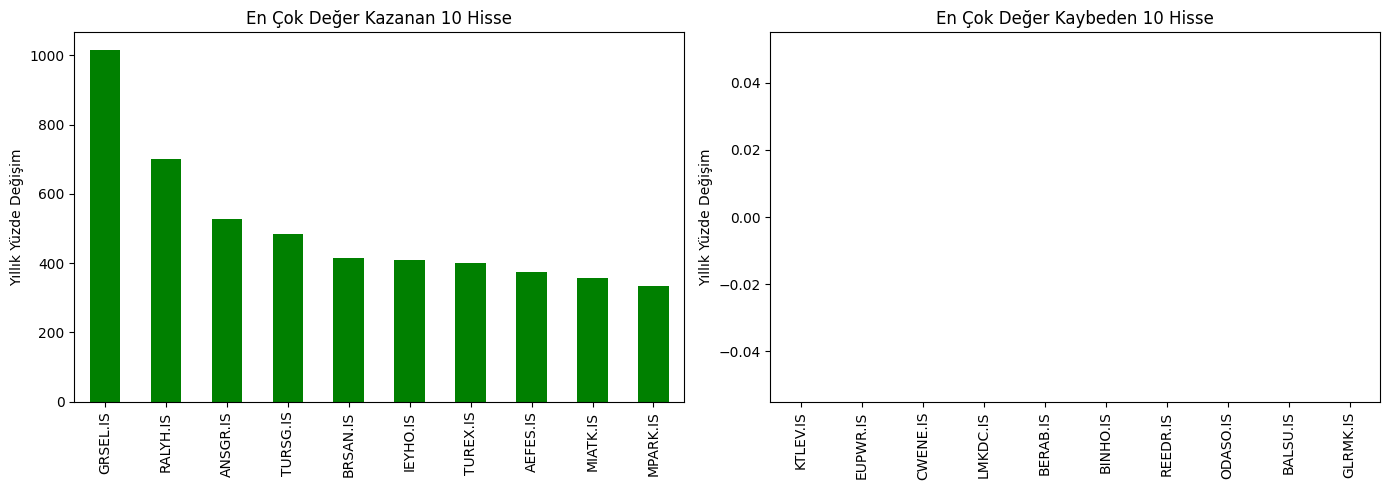

In [19]:
baslangic = df_fiyatlar.iloc[0]
bitis = df_fiyatlar.iloc[-1]

yuzde_degisim = ((bitis - baslangic) / baslangic) * 100
yuzde_degisim = yuzde_degisim.sort_values(ascending=False)

en_cok_artan = yuzde_degisim.head(10)
en_cok_azalan = yuzde_degisim.tail(10)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
en_cok_artan.plot(kind='bar', color='green')
plt.title("En Çok Değer Kazanan 10 Hisse")
plt.ylabel("Yıllık Yüzde Değişim")

plt.subplot(1, 2, 2)
en_cok_azalan.plot(kind='bar', color='red')
plt.title("En Çok Değer Kaybeden 10 Hisse")
plt.ylabel("Yıllık Yüzde Değişim")

plt.tight_layout()
plt.show()

# Korelasyon Matrisi (Isı Haritası – Heatmap)

Hisselerin günlük getirileri arasındaki ilişki ısı haritası (heatmap) ile görselleştirilmiş;  
portföy çeşitlendirmesi için korelasyonları düşük hisseler belirlenmiştir.

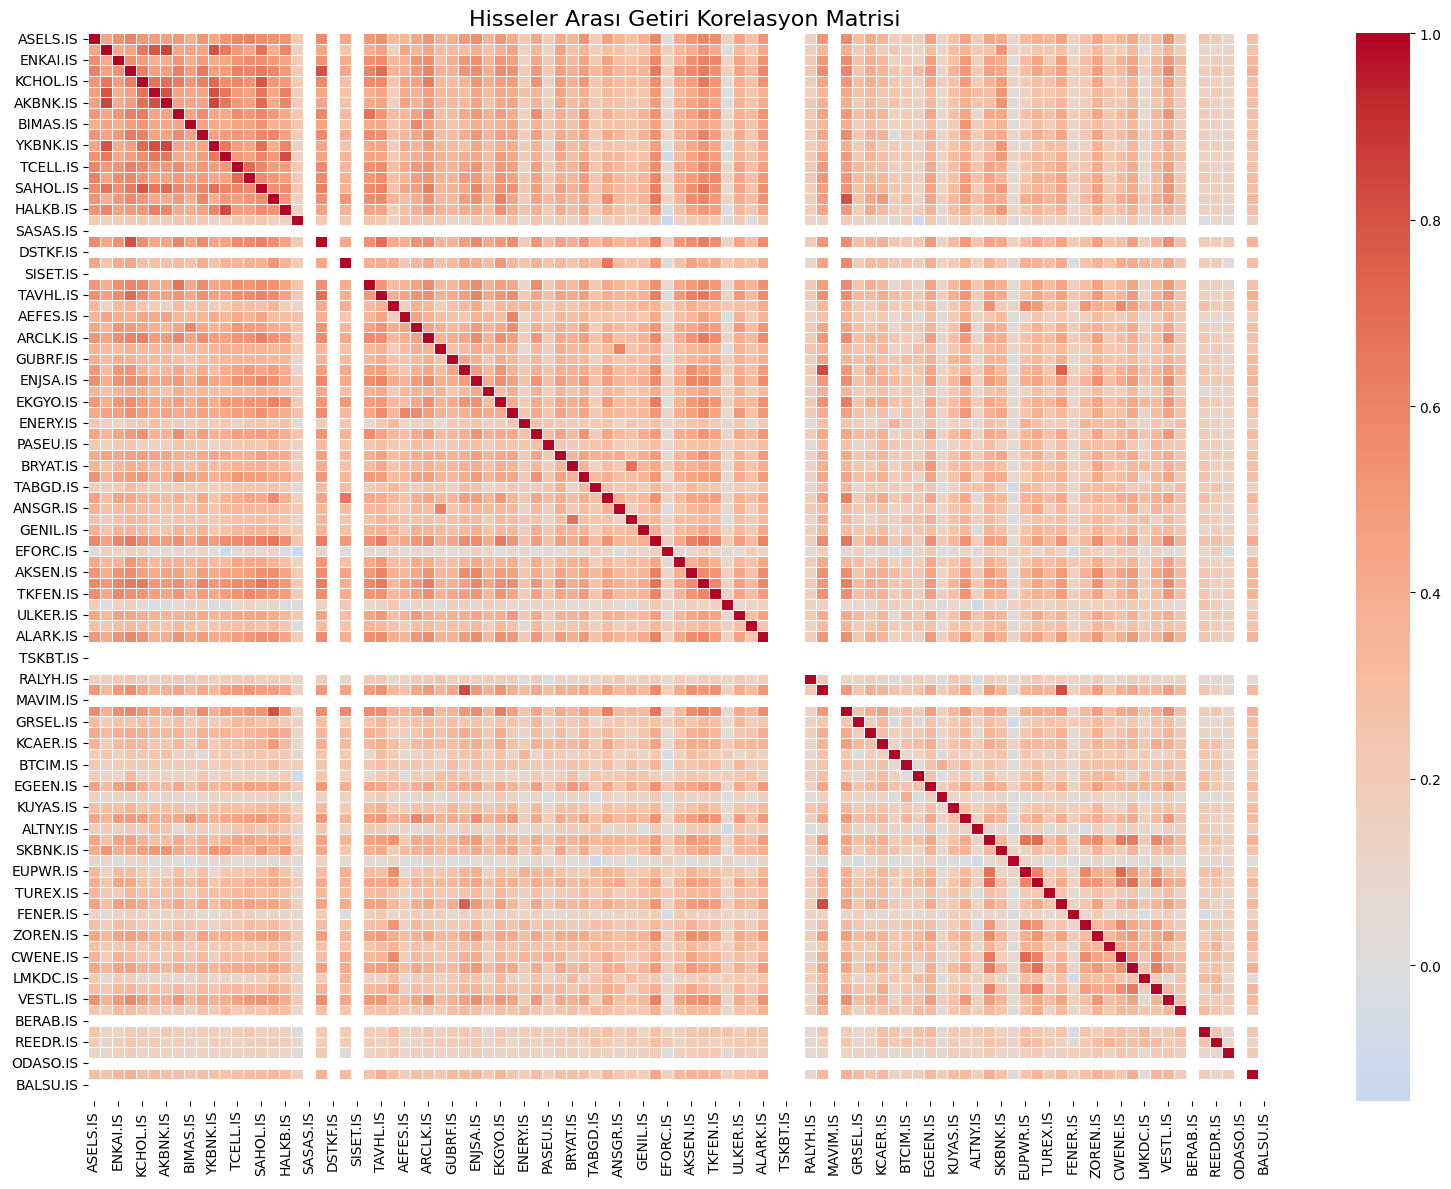

In [20]:
corr_matrix = df_fiyatlar.pct_change().corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, linewidths=0.5)
plt.title("Hisseler Arası Getiri Korelasyon Matrisi", fontsize=16)
plt.tight_layout()
plt.show()

## En yüksek korelasyonlu çiftler



In [21]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
corr_flat = corr_matrix.where(~mask).stack().sort_values(ascending=False)
print(corr_flat.head(10))

AKBNK.IS  GARAN.IS    0.850148
YKBNK.IS  AKBNK.IS    0.847756
KOZAA.IS  KOZAL.IS    0.828351
HALKB.IS  VAKBN.IS    0.821944
IPEKE.IS  KOZAA.IS    0.821079
YKBNK.IS  ISCTR.IS    0.817811
PGSUS.IS  THYAO.IS    0.810798
KRDMD.IS  EREGL.IS    0.810760
AKBNK.IS  ISCTR.IS    0.809362
YKBNK.IS  GARAN.IS    0.799971
dtype: float64


# Sharpe Oranı Hesaplama

Her hisse için yıllık getiri ve volatilite hesaplanmış, risksiz getiri %30 varsayımıyla Sharpe Oranı hesaplanmıştır.  
Bu sayede risk başına ne kadar getiri üretildiği değerlendirilmiştir.

In [22]:
risksiz_faiz_orani = 0.30

hisse_analiz['Sharpe Oranı'] = (hisse_analiz['Yıllık Getiri (%)'] / 100 - risksiz_faiz_orani) / (hisse_analiz['Volatilite (%)'] / 100)
hisse_analiz.sort_values("Sharpe Oranı", ascending=False).head(10)

,Hisse,Ortalama Fiyat,Volatilite (%),Yıllık Getiri (%),Sharpe Oranı
EFORC.IS,EFORC.IS,33.471301,3.626317,1686.016638,456.666296
ALTNY.IS,ALTNY.IS,90.449808,4.588876,421.544172,85.324629
GRSEL.IS,GRSEL.IS,77.574789,3.778752,306.433870,73.154812
GRTHO.IS,GRTHO.IS,65.793004,4.473304,341.439879,69.621892
RALYH.IS,RALYH.IS,25.169410,3.026649,222.434621,63.580097
ASTOR.IS,ASTOR.IS,89.800454,3.903002,265.431146,60.320524
ANSGR.IS,ANSGR.IS,56.519510,3.229138,189.208686,49.303773
TURSG.IS,TURSG.IS,4.556952,2.996670,173.890868,48.016928
PASEU.IS,PASEU.IS,17.866092,3.934102,209.162030,45.540770
KTLEV.IS,KTLEV.IS,4.274044,5.088856,248.794068,42.994749


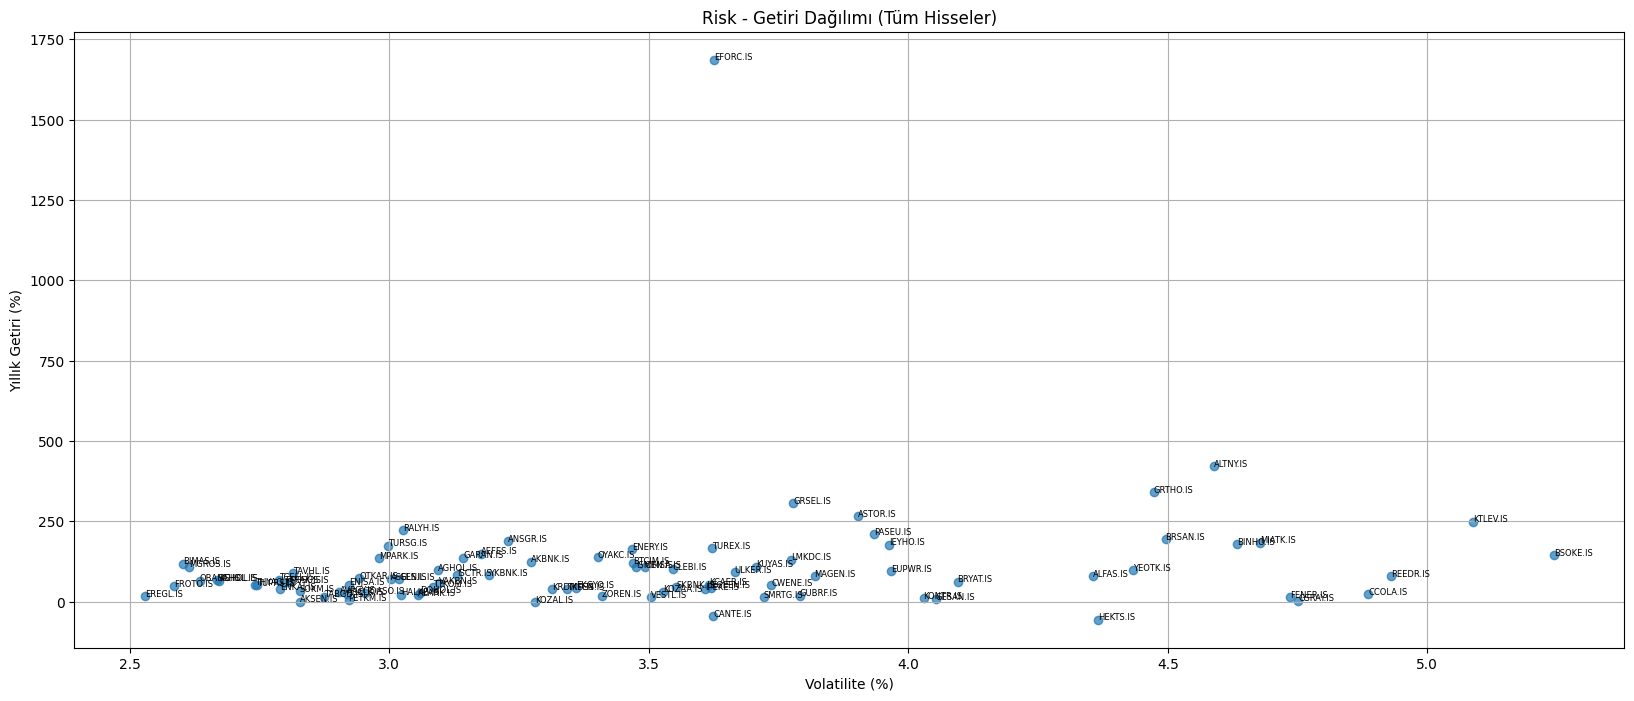

In [30]:
plt.figure(figsize=(20,8))
plt.scatter(hisse_analiz['Volatilite (%)'], hisse_analiz['Yıllık Getiri (%)'], alpha=0.7)
for i in range(len(hisse_analiz)):
    plt.text(hisse_analiz['Volatilite (%)'][i], hisse_analiz['Yıllık Getiri (%)'][i], hisse_analiz['Hisse'][i], fontsize=6)
plt.xlabel("Volatilite (%)")
plt.ylabel("Yıllık Getiri (%)")
plt.title("Risk - Getiri Dağılımı (Tüm Hisseler)")
plt.grid(True)
plt.show()

# 4 Portföylü Kümülatif Getiri Karşılaştırması

4 farklı portföy (her biri 4 hisseden oluşan) seçilmiştir.  
Portföylerin eşit ağırlıklı olarak kümülatif getirileri hesaplanmış ve 2x2 subplot grafik ile karşılaştırılmıştır.


In [24]:
portfoyler = {
    "Portföy 1": ['ASELS.IS', 'THYAO.IS', 'KCHOL.IS', 'BIMAS.IS'],
    "Portföy 2": ['AKBNK.IS', 'ISCTR.IS', 'SAHOL.IS', 'FROTO.IS'],
    "Portföy 3": ['TUPRS.IS', 'EREGL.IS', 'KOZAL.IS', 'ARCLK.IS'],
    "Portföy 4": ['PGSUS.IS', 'GUBRF.IS', 'MPARK.IS', 'VESTL.IS']
}


In [25]:
portfoy_kumulatif = {}

for ad, hisseler in portfoyler.items():
    fiyatlar = df_fiyatlar[hisseler]
    getiriler = fiyatlar.pct_change().dropna()
    portfoy_getiri = getiriler.mean(axis=1)
    kumulatif = (1 + portfoy_getiri).cumprod()
    portfoy_kumulatif[ad] = kumulatif

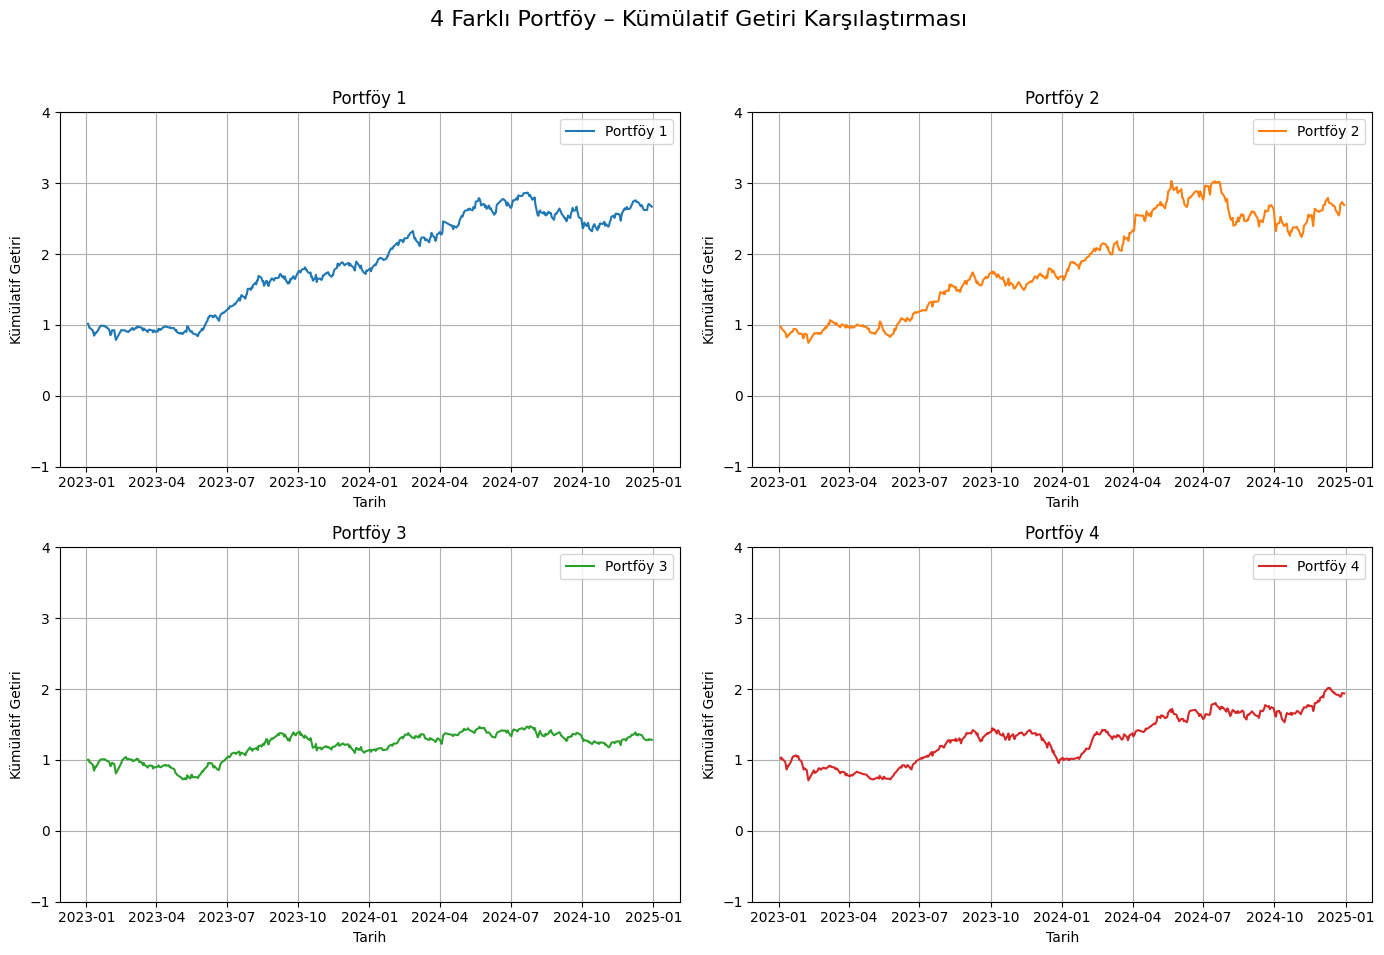

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle(' 4 Farklı Portföy – Kümülatif Getiri Karşılaştırması', fontsize=16)

for i, (ad, seri) in enumerate(portfoy_kumulatif.items()):
    ax = axs[i // 2, i % 2]
    ax.plot(seri, label=ad, color=plt.cm.tab10(i))
    ax.set_title(f"{ad}")
    ax.set_xlabel("Tarih")
    ax.set_ylabel("Kümülatif Getiri")
    ax.set_ylim(-1, 4)
    ax.grid(True)
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Portföy Performans Özeti

Her portföyün yıllık performans metrikleri hesaplanarak tablo şeklinde sunulmuştur.  
Risk-getiri verimliliği kıyaslanmıştır.

In [27]:
risksiz_faiz_orani = 0.30

portfoy_sonuclar = []

for ad, hisseler in portfoyler.items():
    fiyatlar = df_fiyatlar[hisseler]
    getiriler = fiyatlar.pct_change().dropna()

    portfoy_getiri = getiriler.mean(axis=1)

    yillik_getiri = (1 + portfoy_getiri.mean()) ** 252 - 1

    yillik_volatilite = portfoy_getiri.std() * np.sqrt(252)

    sharpe = (yillik_getiri - risksiz_faiz_orani) / yillik_volatilite

    portfoy_sonuclar.append({
        "Portföy": ad,
        "Yıllık Getiri (%)": round(yillik_getiri * 100, 2),
        "Yıllık Volatilite (%)": round(yillik_volatilite * 100, 2),
        "Sharpe Oranı": round(sharpe, 2)
    })

df_portfoy_sonuclar = pd.DataFrame(portfoy_sonuclar)

display(df_portfoy_sonuclar)

,Portföy,Yıllık Getiri (%),Yıllık Volatilite (%),Sharpe Oranı
0,Portföy 1,74.84,34.99,1.28
1,Portföy 2,78.34,39.23,1.23
2,Portföy 3,20.99,35.96,-0.25
3,Portföy 4,50.46,38.26,0.53


# 🔮 7. Prophet ile Gelecek Tahmini (180 Gün)

Facebook Prophet algoritması kullanılarak her portföy için 180 günlük ileriye dönük fiyat tahmini yapılmıştır.  
Gerçek ve tahmin verileri aynı grafikte gösterilmiş, belirsizlik aralıkları (gray area) dahil edilmiştir.

---

In [28]:
!pip install prophet --quiet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpen2io35s/5i_1i29b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpen2io35s/phoh4bh0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16689', 'data', 'file=/tmp/tmpen2io35s/5i_1i29b.json', 'init=/tmp/tmpen2io35s/phoh4bh0.json', 'output', 'file=/tmp/tmpen2io35s/prophet_model2jz_su8d/prophet_model-20250704002814.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:28:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:28:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/t

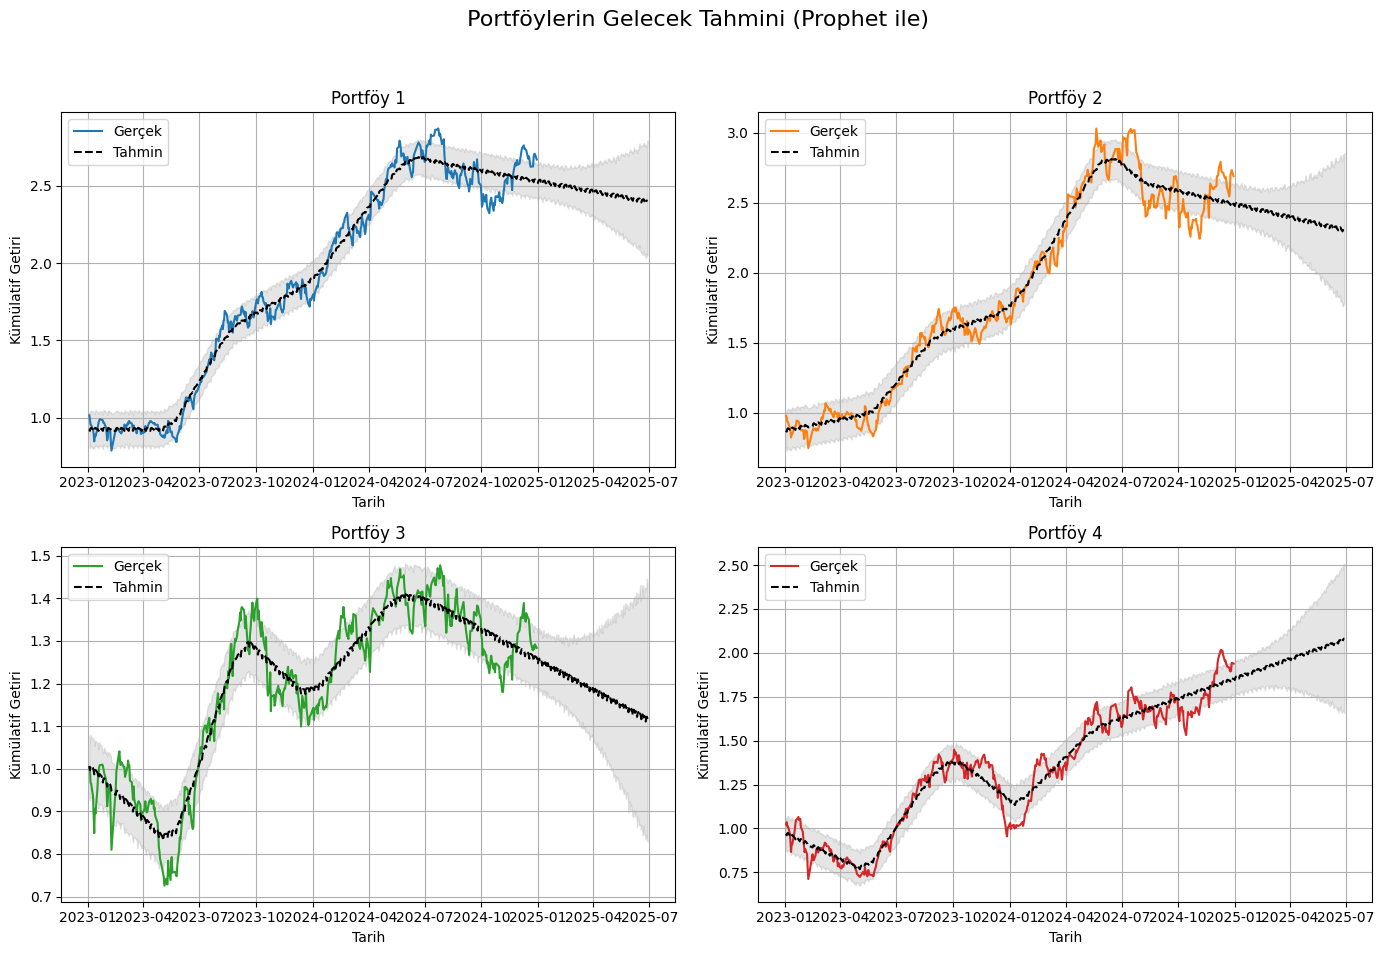

In [29]:
from prophet import Prophet

tahmin_gun = 180

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle(" Portföylerin Gelecek Tahmini (Prophet ile)", fontsize=16)

for i, (ad, seri) in enumerate(portfoy_kumulatif.items()):

    df_prophet = pd.DataFrame()
    df_prophet['ds'] = seri.index
    df_prophet['y'] = seri.values

    model = Prophet(daily_seasonality=True)
    model.fit(df_prophet)

    future = model.make_future_dataframe(periods=tahmin_gun)
    forecast = model.predict(future)

    ax = axs[i // 2, i % 2]
    ax.plot(df_prophet['ds'], df_prophet['y'], label='Gerçek', color=plt.cm.tab10(i))
    ax.plot(forecast['ds'], forecast['yhat'], label='Tahmin', linestyle='--', color='black')
    ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], alpha=0.2, color='gray')

    ax.set_title(ad)
    ax.set_xlabel("Tarih")
    ax.set_ylabel("Kümülatif Getiri")
    ax.grid(True)
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# ⚠️ Uyarı


---


**❗️Bu çalışma yalnızca analiz ve eğitim amaçlıdır.  
Hiçbir şekilde yatırım tavsiyesi içermez. Sonuçlar geçmiş verilere dayalıdır, gelecek için garanti vermez.**


---

